In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import time
from scipy.ndimage import zoom

%matplotlib inline

In [2]:
def next_hand(deck, loti, cast_wheels, wheels_needed):
    if cast_wheels >= wheels_needed and loti - cast_wheels >= 0:
        return 1.
    if loti - cast_wheels <= -1:
        return 0.
    hand_1 = ss.hypergeom(deck, init_lotus-loti, 7)
    p_1 = hand_1.pmf(np.arange(0, 7+1))
    ptot = 0.
    for i in range(len(p_1)-1):
        if p_1[i] > 0.:
            ptot += p_1[i] * next_hand(deck - 7, loti + i, cast_wheels + 1, wheels_needed)
    return ptot

def calculate_win_prob(init_deck, init_lotus):
    wheels_needed = 5
    hand_0 = ss.hypergeom(init_deck, init_lotus, 8)
    p_0 = hand_0.pmf(np.arange(0, 8+1))
    ptot = 0.
    for i in range(1,len(p_0)-1):
        if p_0[i] > 0.:
            ptot += p_0[i] * next_hand(init_deck - 8, i, 1, wheels_needed)
    return ptot

In [3]:
init_deck = 43
init_lotus_arr = np.asarray(range(0,init_deck + 1))
#init_lotus_arr = np.asarray(range(4,5))
p = []
start_time = time.time()
for init_lotus in init_lotus_arr:
    p_i = calculate_win_prob(init_deck, init_lotus)
    p.append(p_i)
    print('N_lotus = ' + str(init_lotus) + ', P = ' + str(p_i) + ', time spent = ' + str(time.time()-start_time) + ' s.')
p = np.asarray(p)


N_lotus = 0, P = 0.0, time spent = 0.004884004592895508 s.
N_lotus = 1, P = 0.0, time spent = 0.009636163711547852 s.
N_lotus = 2, P = 0.0, time spent = 0.01866292953491211 s.
N_lotus = 3, P = 0.0, time spent = 0.04044198989868164 s.
N_lotus = 4, P = 0.0, time spent = 0.09096002578735352 s.
N_lotus = 5, P = 0.18604651162790725, time spent = 0.19637799263000488 s.
N_lotus = 6, P = 0.4170476805041084, time spent = 0.4052281379699707 s.
N_lotus = 7, P = 0.5992158543133267, time spent = 0.870107889175415 s.
N_lotus = 8, P = 0.7238611018651038, time spent = 1.5123660564422607 s.
N_lotus = 9, P = 0.8075228383315689, time spent = 2.311415195465088 s.
N_lotus = 10, P = 0.8646629189118525, time spent = 3.3598310947418213 s.
N_lotus = 11, P = 0.9043729834634725, time spent = 4.808635950088501 s.
N_lotus = 12, P = 0.9322736529106218, time spent = 6.644418239593506 s.
N_lotus = 13, P = 0.9519842169031798, time spent = 8.91169810295105 s.
N_lotus = 14, P = 0.9658944509123123, time spent = 11.287897

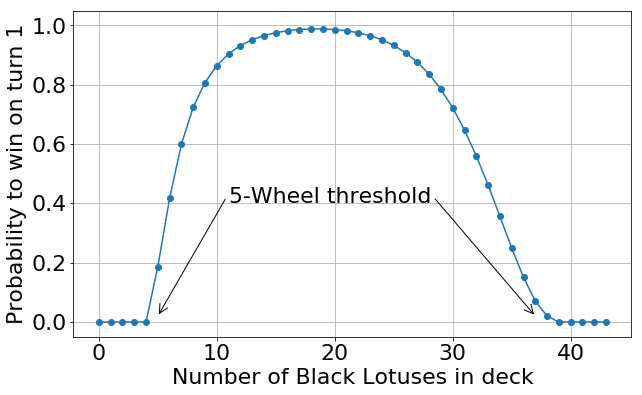

In [4]:
deck_size = 43
font = {'family' : 'sans-serif', 'weight' : 'normal', 'size' : 22}
plt.rc('font', **font)
plt.plot(init_lotus_arr,p,'o-')
plt.gca().set_ylim(-0.05,1.05)
plt.grid()
plt.gca().set_xlabel('Number of Black Lotuses in deck')
plt.gca().set_ylabel('Probability to win on turn 1')
plt.annotate(s='', xy=(5,0.02), xytext=(10.8,0.42), arrowprops=dict(arrowstyle='->'))
plt.annotate(s='', xy=(43-6,0.02), xytext=(28.4,0.42), arrowprops=dict(arrowstyle='->'))
plt.text(x=11, y=0.4, s='5-Wheel threshold')

plt.gcf().set_size_inches(10,6)
plt.savefig('deck_size_'+str(deck_size)+'_'+'ave_win_turn_hypergeometric.jpg',dpi=100)
plt.show()

In [5]:
pt1 = []
start_time = time.time()

init_deck_arr = np.asarray(range(43,52 + 1))
init_lotus_arr = np.asarray(range(15,25 + 1))
for init_deck in init_deck_arr:
    for init_lotus in init_lotus_arr:
        p_i = calculate_win_prob(init_deck, init_lotus)
        pt1.append(p_i)
        print('Deck size = ' + str(init_deck) + ', N_lotus = ' + str(init_lotus) + ', P = ' + str(p_i) + ', time spent = ' + str(time.time()-start_time) + ' s.')
pt1 = np.asarray(pt1)

#plt.plot(init_lotus_arr, p, '-o')

Deck size = 43, N_lotus = 15, P = 0.975595505492792, time spent = 2.2916412353515625 s.
Deck size = 43, N_lotus = 16, P = 0.9821395936492479, time spent = 4.737973213195801 s.
Deck size = 43, N_lotus = 17, P = 0.9861985230507754, time spent = 7.4599449634552 s.
Deck size = 43, N_lotus = 18, P = 0.9881598480909569, time spent = 10.158278942108154 s.
Deck size = 43, N_lotus = 19, P = 0.9881839934148109, time spent = 12.984218120574951 s.
Deck size = 43, N_lotus = 20, P = 0.9862360765822537, time spent = 15.815041065216064 s.
Deck size = 43, N_lotus = 21, P = 0.982100744087902, time spent = 18.62610912322998 s.
Deck size = 43, N_lotus = 22, P = 0.975385535419667, time spent = 21.38951826095581 s.
Deck size = 43, N_lotus = 23, P = 0.9655170075423997, time spent = 24.084316968917847 s.
Deck size = 43, N_lotus = 24, P = 0.9517336221252379, time spent = 26.605870246887207 s.
Deck size = 43, N_lotus = 25, P = 0.9330801223684365, time spent = 28.926056146621704 s.
Deck size = 44, N_lotus = 15, 

Deck size = 51, N_lotus = 20, P = 0.9839471743925676, time spent = 265.57694697380066 s.
Deck size = 51, N_lotus = 21, P = 0.9860941218504718, time spent = 268.50557112693787 s.
Deck size = 51, N_lotus = 22, P = 0.9867308722109396, time spent = 271.49356412887573 s.
Deck size = 51, N_lotus = 23, P = 0.9858849496809251, time spent = 274.52019214630127 s.
Deck size = 51, N_lotus = 24, P = 0.9834867618338985, time spent = 277.57395005226135 s.
Deck size = 51, N_lotus = 25, P = 0.9793747367292566, time spent = 280.7010371685028 s.
Deck size = 52, N_lotus = 15, P = 0.9350816044825555, time spent = 282.95511507987976 s.
Deck size = 52, N_lotus = 16, P = 0.9509750114363575, time spent = 285.3864121437073 s.
Deck size = 52, N_lotus = 17, P = 0.9628690753969927, time spent = 287.98251700401306 s.
Deck size = 52, N_lotus = 18, P = 0.9716845314659399, time spent = 290.740611076355 s.
Deck size = 52, N_lotus = 19, P = 0.978073678764379, time spent = 293.61345410346985 s.
Deck size = 52, N_lotus = 

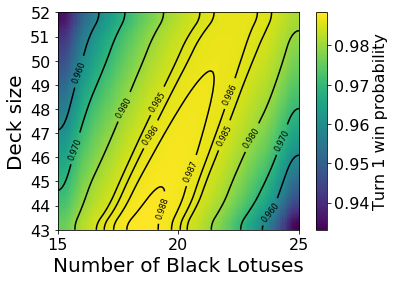

In [11]:
n_lotus = init_lotus_arr
deck_size = init_deck_arr
data = pt1.reshape((len(deck_size), len(n_lotus))).transpose()

llx = 15; ulx = 25; lly = 43; uly = 52;

zoomf = 10
smdata = zoom(data, zoomf, order=2)
X,Y = np.meshgrid(np.linspace(n_lotus[0], n_lotus[-1], len(n_lotus)*zoomf), np.linspace(deck_size[0], deck_size[-1], len(deck_size)*zoomf))
levels = np.asarray([0.96, 0.97, 0.98, 0.985, 0.986, 0.987, 0.988])
contours = plt.contour(X, Y, np.transpose(smdata), levels, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(np.transpose(smdata), extent=[15,25,43,52], origin='lower', cmap='viridis', interpolation='none')
plt.xlabel('Number of Black Lotuses',fontsize=20)
plt.ylabel('Deck size',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(range(43,53),fontsize=16)

cb = plt.colorbar()
cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=16)
cb.set_label('Turn 1 win probability',size=16)

plt.savefig('turn1_probability_map_hypergeometric.jpg',dpi=300, bbox_inches='tight')
plt.show()



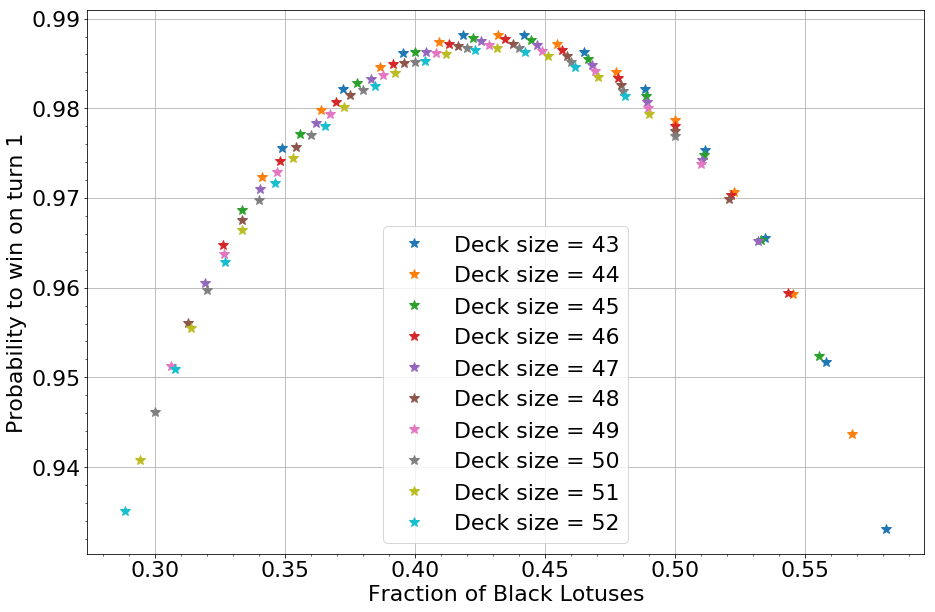

In [12]:
p_win_by_turn_1 = pt1.reshape((len(deck_size), len(n_lotus))).transpose()
font = {'family' : 'sans-serif', 'weight' : 'normal', 'size' : 22}
plt.rc('font', **font)
for ds in range(len(deck_size)):
    plt.plot(n_lotus/deck_size[ds], p_win_by_turn_1[:,ds],'*',markersize = 10,label='Deck size = ' + str(int(deck_size[0]+ds)))


plt.gcf().set_size_inches(15,10)
plt.legend()
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-')
#plt.grid(which = 'minor', linestyle = '--')
plt.xlabel('Fraction of Black Lotuses',fontsize=22)
plt.ylabel('Probability to win on turn 1',fontsize=22)
plt.savefig('probability_collapse_hypergeometric.jpg',dpi=300, bbox_inches='tight')
plt.show()